In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataframes
properties = pd.read_csv('./properties_2016.csv')
train = pd.read_csv('./train_2016.csv')

//anaconda/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# throw away all properties that aren't listed as sold in train_2016.csv
joined = train.merge(properties,on='parcelid', how='left')
joined.to_csv('./sold_properties_2016.csv')

In [4]:
# new df containing only sold properties
soldprop_df = pd.read_csv('./sold_properties_2016.csv', index_col=0)

In [5]:
# looking at the data
soldprop_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [6]:
# defining a helper function to see the NaN ratio in our df
sold_count = soldprop_df.shape[0]
def nan_ratio(rec):
    nan_count = sum(pd.isnull(rec))
    return (nan_count/sold_count)*100

In [7]:
# soldprop_df.apply(nan_ratio).sort_values().plot(kind='bar', figsize=(17, 5))

In [8]:
soldprop_df.apply(nan_ratio)

parcelid                         0.000000
logerror                         0.000000
transactiondate                  0.000000
airconditioningtypeid           68.306703
architecturalstyletypeid        99.712590
basementsqft                    99.952649
bathroomcnt                      0.590237
bedroomcnt                       0.590237
buildingclasstypeid             99.982381
buildingqualitytypeid           36.831441
calculatedbathnbr                1.891841
decktypeid                      99.275418
finishedfloor1squarefeet        92.450254
calculatedfinishedsquarefeet     1.318122
finishedsquarefeet12             5.742696
finishedsquarefeet13            99.963661
finishedsquarefeet15            96.075365
finishedsquarefeet50            92.450254
finishedsquarefeet6             99.536400
fips                             0.590237
fireplacecnt                    89.420885
fullbathcnt                      1.891841
garagecarcnt                    67.033729
garagetotalsqft                 67

In [9]:
# we want to keep the rows with 50% or less are NaNs
nan_df = soldprop_df.dropna(thresh=len(soldprop_df) - soldprop_df.shape[0]/2, axis=1)
nan_df.apply(nan_ratio).sort_values()

parcelid                         0.000000
logerror                         0.000000
transactiondate                  0.000000
bathroomcnt                      0.590237
bedroomcnt                       0.590237
assessmentyear                   0.590237
roomcnt                          0.590237
fips                             0.590237
regionidcounty                   0.590237
rawcensustractandblock           0.590237
latitude                         0.590237
longitude                        0.590237
propertylandusetypeid            0.590237
landtaxvaluedollarcnt            0.591338
taxvaluedollarcnt                0.591338
propertycountylandusecode        0.591338
taxamount                        0.596844
regionidzip                      0.628778
structuretaxvaluedollarcnt       1.008688
censustractandblock              1.256456
calculatedfinishedsquarefeet     1.318122
yearbuilt                        1.422735
fullbathcnt                      1.891841
calculatedbathnbr                1

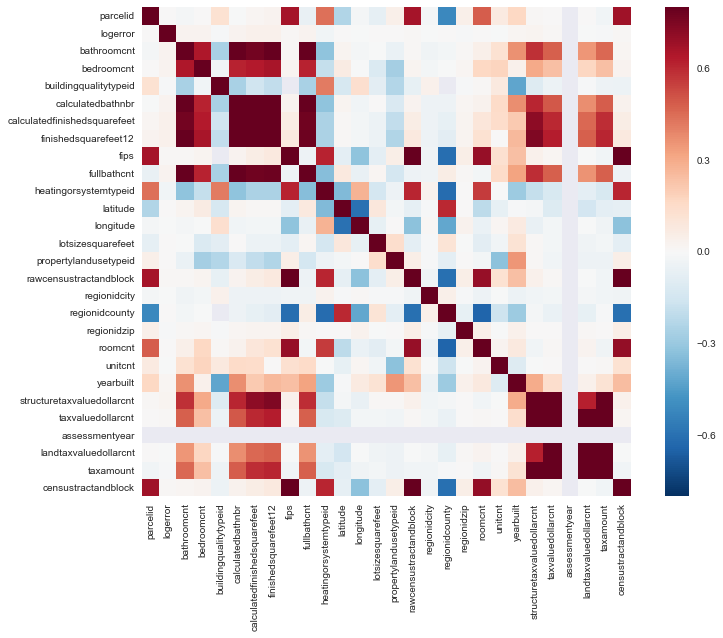

In [10]:
# make a preliminary correlation map
corrmat = nan_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0.8, square=True)

### Fill NaN values with the mean of that column

In [11]:
# features with < 6% of NaNs
col_mean = ['parcelid', 'logerror', 'transactiondate','propertylandusetypeid', 'longitude', 'latitude', 'roomcnt', 'fips', 
               'rawcensustractandblock', 'assessmentyear', 'bedroomcnt', 'bathroomcnt', 'regionidcounty','taxvaluedollarcnt',
               'landtaxvaluedollarcnt', 'taxamount', 'regionidzip', 
               'structuretaxvaluedollarcnt', 'censustractandblock', 'calculatedfinishedsquarefeet', 'yearbuilt', 
               'fullbathcnt', 'calculatedbathnbr', 'regionidcity', 'finishedsquarefeet12', 'lotsizesquarefeet', 'unitcnt']
# creating new df with those features
full_df = nan_df[col_mean]
full_df

,parcelid,logerror,transactiondate,propertylandusetypeid,longitude,latitude,roomcnt,fips,rawcensustractandblock,assessmentyear,...,structuretaxvaluedollarcnt,censustractandblock,calculatedfinishedsquarefeet,yearbuilt,fullbathcnt,calculatedbathnbr,regionidcity,finishedsquarefeet12,lotsizesquarefeet,unitcnt
0,11016594,0.0276,2016-01-01,261.0,-118488536.0,34280990.0,0.0,6037.0,6.037107e+07,2015.0,...,122754.0,6.037107e+13,1684.0,1959.0,2.0,2.0,12447.0,1684.0,7528.0,1.0
1,14366692,-0.1684,2016-01-01,261.0,-117677556.0,33668120.0,0.0,6059.0,6.059052e+07,2015.0,...,346458.0,NaN,2263.0,2014.0,3.0,3.5,32380.0,2263.0,3643.0,NaN
2,12098116,-0.0040,2016-01-01,261.0,-118175032.0,34136312.0,0.0,6037.0,6.037464e+07,2015.0,...,61994.0,6.037464e+13,2217.0,1940.0,3.0,3.0,47019.0,2217.0,11423.0,1.0
3,12643413,0.0218,2016-01-02,266.0,-118309000.0,33755800.0,0.0,6037.0,6.037296e+07,2015.0,...,171518.0,6.037296e+13,839.0,1987.0,2.0,2.0,12447.0,839.0,70859.0,1.0
4,14432541,-0.0050,2016-01-02,261.0,-117700234.0,33485643.0,8.0,6059.0,6.059042e+07,2015.0,...,169574.0,6.059042e+13,2283.0,1981.0,2.0,2.5,17686.0,2283.0,6000.0,NaN
5,11509835,-0.2705,2016-01-02,261.0,-118402768.0,33870089.0,0.0,6037.0,6.037621e+07,2015.0,...,880650.0,6.037621e+13,3067.0,1982.0,4.0,4.0,29712.0,3067.0,2708.0,1.0
6,12286022,0.0440,2016-01-02,261.0,-118212720.0,33899475.0,0.0,6037.0,6.037542e+07,2015.0,...,64549.0,6.037542e+13,1297.0,1939.0,1.0,1.0,24174.0,1297.0,6677.0,1.0
7,17177301,0.1638,2016-01-02,266.0,-119165589.0,34207204.0,6.0,6111.0,6.111003e+07,2015.0,...,107000.0,6.111003e+13,1763.0,1994.0,2.0,2.5,13150.0,1763.0,NaN,NaN
8,14739064,-0.0030,2016-01-02,266.0,-117678000.0,33549600.0,0.0,6059.0,6.059042e+07,2015.0,...,66834.0,6.059042e+13,796.0,1984.0,1.0,1.0,25459.0,796.0,NaN,NaN
9,14677559,0.0843,2016-01-03,266.0,-117742000.0,33612700.0,5.0,6059.0,6.059063e+07,2015.0,...,109977.0,6.059063e+13,1260.0,1977.0,2.0,2.0,46098.0,1260.0,NaN,NaN


In [12]:
# filling the missing values with the mean of the column
full_df = full_df.fillna(full_df.mean())

In [13]:
full_df.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
propertylandusetypeid           0
longitude                       0
latitude                        0
roomcnt                         0
fips                            0
rawcensustractandblock          0
assessmentyear                  0
bedroomcnt                      0
bathroomcnt                     0
regionidcounty                  0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
regionidzip                     0
structuretaxvaluedollarcnt      0
censustractandblock             0
calculatedfinishedsquarefeet    0
yearbuilt                       0
fullbathcnt                     0
calculatedbathnbr               0
regionidcity                    0
finishedsquarefeet12            0
lotsizesquarefeet               0
unitcnt                         0
dtype: int64

In [14]:
full_df.to_csv('clean_data_zillow.csv')

In [17]:
new = pd.read_csv('./clean_data_zillow.csv',index_col=0)

In [18]:
new

,parcelid,logerror,transactiondate,propertylandusetypeid,longitude,latitude,roomcnt,fips,rawcensustractandblock,assessmentyear,...,structuretaxvaluedollarcnt,censustractandblock,calculatedfinishedsquarefeet,yearbuilt,fullbathcnt,calculatedbathnbr,regionidcity,finishedsquarefeet12,lotsizesquarefeet,unitcnt
0,11016594,0.0276,2016-01-01,261.0,-118488536.0,34280990.0,0.0,6037.0,6.037107e+07,2015.0,...,122754.0,6.037107e+13,1684.0,1959.0,2.0,2.0,12447.000000,1684.000000,7528.000000,1.000000
1,14366692,-0.1684,2016-01-01,261.0,-117677556.0,33668120.0,0.0,6059.0,6.059052e+07,2015.0,...,346458.0,6.049151e+13,2263.0,2014.0,3.0,3.5,32380.000000,2263.000000,3643.000000,1.110414
2,12098116,-0.0040,2016-01-01,261.0,-118175032.0,34136312.0,0.0,6037.0,6.037464e+07,2015.0,...,61994.0,6.037464e+13,2217.0,1940.0,3.0,3.0,47019.000000,2217.000000,11423.000000,1.000000
3,12643413,0.0218,2016-01-02,266.0,-118309000.0,33755800.0,0.0,6037.0,6.037296e+07,2015.0,...,171518.0,6.037296e+13,839.0,1987.0,2.0,2.0,12447.000000,839.000000,70859.000000,1.000000
4,14432541,-0.0050,2016-01-02,261.0,-117700234.0,33485643.0,8.0,6059.0,6.059042e+07,2015.0,...,169574.0,6.059042e+13,2283.0,1981.0,2.0,2.5,17686.000000,2283.000000,6000.000000,1.110414
5,11509835,-0.2705,2016-01-02,261.0,-118402768.0,33870089.0,0.0,6037.0,6.037621e+07,2015.0,...,880650.0,6.037621e+13,3067.0,1982.0,4.0,4.0,29712.000000,3067.000000,2708.000000,1.000000
6,12286022,0.0440,2016-01-02,261.0,-118212720.0,33899475.0,0.0,6037.0,6.037542e+07,2015.0,...,64549.0,6.037542e+13,1297.0,1939.0,1.0,1.0,24174.000000,1297.000000,6677.000000,1.000000
7,17177301,0.1638,2016-01-02,266.0,-119165589.0,34207204.0,6.0,6111.0,6.111003e+07,2015.0,...,107000.0,6.111003e+13,1763.0,1994.0,2.0,2.5,13150.000000,1763.000000,29110.164177,1.110414
8,14739064,-0.0030,2016-01-02,266.0,-117678000.0,33549600.0,0.0,6059.0,6.059042e+07,2015.0,...,66834.0,6.059042e+13,796.0,1984.0,1.0,1.0,25459.000000,796.000000,29110.164177,1.110414
9,14677559,0.0843,2016-01-03,266.0,-117742000.0,33612700.0,5.0,6059.0,6.059063e+07,2015.0,...,109977.0,6.059063e+13,1260.0,1977.0,2.0,2.0,46098.000000,1260.000000,29110.164177,1.110414
